<a href="https://colab.research.google.com/github/sri-haneesha/Patient-Diet-Recommendation-System-Using-Deep-Learning/blob/main/Patient_Diet_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
# Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Patient_dataset.xlsx to Patient_dataset (1).xlsx


In [ ]:
import io
df1 = pd.read_excel(io.BytesIO(uploaded['Patient_dataset.xlsx']))
print(df1)


    USER NO  AGE GENDER  WEIGHT  ... SODIUM  CARBOHYDRATES  FIBER  CHOLESTROL
0         1   24      F      52  ...    148         954.72     20         192
1         2   48      M      62  ...    141        1288.96     30         136
2         3   39      M      74  ...    145        1047.28     22         199
3         4   40      M      65  ...    119         867.10     19         152
4         5   36      F      59  ...    121        1116.64     19         140
5         6   59      F      74  ...    115         959.83     18         189
6         7   50      M      73  ...    151        1064.96     27         192
7         8   51      F      67  ...    111        1181.88     30         140
8         9   54      F      61  ...    129         966.77     31         189
9        10   20      F      56  ...    144        1101.96     12         191
10       11   41      F      63  ...    141        1053.00     17         181
11       12   56      F      73  ...    129        1271.85     1

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Product_dataset.xlsx to Product_dataset (1).xlsx


In [ ]:
import io
df2 = pd.read_excel(io.BytesIO(uploaded['Product_dataset.xlsx']))
print(df2)

      P_BARCODE  P_CALORIES  P_PROTEIN  ...  P_CARBOHYDRATES  P_FIBER  P_CHOLESTROL
0             0         381        0.2  ...             91.2        0             0
1             1         691        9.1  ...             13.8        9             0
2             2          25        0.9  ...              5.8        3             0
3             3         367       13.3  ...             73.1        8             0
4             4         144        1.1  ...             30.4        1             1
...         ...         ...        ...  ...              ...      ...           ...
8784       8784         125       23.4  ...              0.0        0            62
8785       8785         206       29.5  ...              0.0        0           109
8786       8786         277       16.7  ...              0.0        0            78
8787       8787         121       23.3  ...              0.0        0            60
8788       8788         121       23.3  ...              0.0        0       

In [ ]:
patient_copy = df1.copy()

In [ ]:
p_copy = df2.copy()

In [ ]:
df2 = df2.head(1000)

In [ ]:
df2.columns = ["P_BARCODE","P_CALORIES","P_PROTEIN","P_FAT","P_SODIUM","P_CARBOHYDRATES","P_FIBRE","P_CHOLESTROL"]

In [ ]:
df2.P_CHOLESTROL.fillna(df2.P_CHOLESTROL.mean(),inplace=True)
df2.P_FIBRE.fillna(df2.P_FIBRE.mean(),inplace=True)

In [ ]:
    pd.options.mode.chained_assignment = None
    df1.FAT=(df1.FAT - df1.FAT.min())/(df1.FAT.max() - df1.FAT.min())
    df1.CARBOHYDRATES=(df1.CARBOHYDRATES - df1.CARBOHYDRATES.min())/(df1.CARBOHYDRATES.max() - df1.CARBOHYDRATES.min())
    df1.CHOLESTROL=(df1.CHOLESTROL - df1.CHOLESTROL.min())/(df1.CHOLESTROL.max() - df1.CHOLESTROL.min())
    df1.PROTEIN=(df1.PROTEIN - df1.PROTEIN.min())/(df1.PROTEIN.max() - df1.PROTEIN.min())
    df1.CALORIES=(df1.CALORIES - df1.CALORIES.min())/(df1.CALORIES.max() - df1.CALORIES.min())
    df2.P_FAT=(df2.P_FAT - df2.P_FAT.min())/(df2.P_FAT.max() - df2.P_FAT.min())
    df2.P_CARBOHYDRATES=(df2.P_CARBOHYDRATES - df2.P_CARBOHYDRATES.min())/(df2.P_CARBOHYDRATES.max() - df2.P_CARBOHYDRATES.min())
    df2.P_CHOLESTROL=(df2.P_CHOLESTROL - df2.P_CHOLESTROL.min())/(df2.P_CHOLESTROL.max() - df2.P_CHOLESTROL.min())
    df2.P_PROTEIN=(df2.P_PROTEIN - df2.P_PROTEIN.min())/(df2.P_PROTEIN.max() - df2.P_PROTEIN.min())
    df2.P_CALORIES=(df2.P_CALORIES - df2.P_CALORIES.min())/(df2.P_CALORIES.max() - df2.P_CALORIES.min())



In [ ]:
df2

,P_BARCODE,P_CALORIES,P_PROTEIN,P_FAT,P_SODIUM,P_CARBOHYDRATES,P_FIBRE,P_CHOLESTROL
0,0,0.422395,0.002265,0.000,9,0.912913,0,0.000000
1,1,0.766075,0.103058,0.719,0,0.138138,9,0.000000
2,2,0.027716,0.010193,0.001,2,0.058058,3,0.000000
3,3,0.406874,0.150623,0.023,12,0.731732,8,0.000000
4,4,0.159645,0.012458,0.020,46,0.304304,1,0.000433
...,...,...,...,...,...,...,...,...
995,995,0.144124,0.050963,0.006,14,0.261261,0,0.000000
996,996,0.333703,0.158550,0.258,756,0.029029,1,0.040312
997,997,0.121951,0.233296,0.024,69,0.000000,0,0.027308
998,998,0.444568,0.046433,0.136,418,0.680681,1,0.000867


In [ ]:
df1

,USER NO,AGE,WEIGHT,CALORIES,PROTEIN,FAT,SODIUM,CARBOHYDRATES,FIBER,CHOLESTROL,P_FAT,P_CHOLESTROL,P_CARBOHYDRATES,P_PROTEIN,P_CALORIES,P_FIBRE,P_BARCODE,P_SODIUM,GENDER_M,DISEASE_Anemia,DISEASE_Appendicitis,DISEASE_Asthma,DISEASE_Bronchitis,DISEASE_Fibroids,DISEASE_Gallstones,DISEASE_HIgh Cholestrol,DISEASE_Hypoglycemia,DISEASE_Jaundice,DISEASE_Kidney Stones,DISEASE_Liver Cirrhosis,DISEASE_Lung Infection,DISEASE_Pancreatitis,DISEASE_Pneumonia,DISEASE_Thyroid,DISEASE_Tuberculosis,DISEASE_Typhoid,Class_Yes
30,1,24,52,0.653979,0.540541,0.414634,148,0.262985,20,0.478992,0.000,0.000000,0.912913,0.002265,0.422395,0.0,0.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
31,1,24,52,0.653979,0.540541,0.414634,148,0.262985,20,0.478992,0.719,0.000000,0.138138,0.103058,0.766075,9.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
32,1,24,52,0.653979,0.540541,0.414634,148,0.262985,20,0.478992,0.001,0.000000,0.058058,0.010193,0.027716,3.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
33,1,24,52,0.653979,0.540541,0.414634,148,0.262985,20,0.478992,0.023,0.000000,0.731732,0.150623,0.406874,8.0,3.0,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
34,1,24,52,0.653979,0.540541,0.414634,148,0.262985,20,0.478992,0.020,0.000433,0.304304,0.012458,0.159645,1.0,4.0,46.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30025,30,27,64,0.903114,0.594595,0.487805,113,0.289295,34,0.000000,0.006,0.000000,0.261261,0.050963,0.144124,0.0,995.0,14.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
30026,30,27,64,0.903114,0.594595,0.487805,113,0.289295,34,0.000000,0.258,0.040312,0.029029,0.158550,0.333703,1.0,996.0,756.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30027,30,27,64,0.903114,0.594595,0.487805,113,0.289295,34,0.000000,0.024,0.027308,0.000000,0.233296,0.121951,0.0,997.0,69.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30028,30,27,64,0.903114,0.594595,0.487805,113,0.289295,34,0.000000,0.136,0.000867,0.680681,0.046433,0.444568,1.0,998.0,418.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cnt = 30
for i in range(30):
    cal = df1.loc[i,'CALORIES']
    chol = df1.loc[i,'CHOLESTROL']
    carbo = df1.loc[i,'CARBOHYDRATES']
    pro = df1.loc[i,'PROTEIN']
    fib = df1.loc[i,'FIBER']
    ft = df1.loc[i,'FAT']
    sod = df1.loc[i,'SODIUM']
    for j in range(1000):
      pro_fat = df2.loc[j,'P_FAT']
      pro_chol = df2.loc[j,'P_CHOLESTROL']
      pro_carbo = df2.loc[j,'P_CARBOHYDRATES']
      pro_pro = df2.loc[j,'P_PROTEIN']
      pro_cal = df2.loc[j,'P_CALORIES']
      pro_fib = df2.loc[j,'P_FIBRE']
      pro_sod = df2.loc[j,'P_SODIUM']
      df1.loc[cnt] = df1.loc[i]
      df1.loc[cnt,'P_FAT'] = df2.loc[j,'P_FAT']
      df1.loc[cnt,'P_CHOLESTROL'] = df2.loc[j,'P_CHOLESTROL']
      df1.loc[cnt,'P_CARBOHYDRATES'] = df2.loc[j,'P_CARBOHYDRATES']
      df1.loc[cnt,'P_PROTEIN'] = df2.loc[j,'P_PROTEIN']
      df1.loc[cnt,'P_CALORIES'] = df2.loc[j,'P_CALORIES']
      df1.loc[cnt,'P_FIBRE'] = df2.loc[j,'P_FIBRE']
      df1.loc[cnt,'P_BARCODE'] = df2.loc[j,'P_BARCODE']
      df1.loc[cnt,'P_SODIUM'] = df2.loc[j,'P_SODIUM']
      if ft >= pro_fat and chol >= pro_chol and carbo >= pro_carbo and pro >= pro_pro and cal >= pro_cal:
        df1.loc[cnt,'Class'] = "Yes"
      else:
         df1.loc[cnt,'Class'] = "No"
      cnt+=1

In [ ]:
df1 = df1.iloc[30:]

In [ ]:
df1

,USER NO,AGE,GENDER,WEIGHT,DISEASE,CALORIES,PROTEIN,FAT,SODIUM,CARBOHYDRATES,FIBER,CHOLESTROL,P_FAT,P_CHOLESTROL,P_CARBOHYDRATES,P_PROTEIN,P_CALORIES,P_FIBRE,P_BARCODE,P_SODIUM,Class
30,1,24,F,52,Typhoid,0.653979,0.540541,0.414634,148,0.262985,20,0.478992,0.000,0.000000,0.912913,0.002265,0.422395,0.0,0.0,9.0,No
31,1,24,F,52,Typhoid,0.653979,0.540541,0.414634,148,0.262985,20,0.478992,0.719,0.000000,0.138138,0.103058,0.766075,9.0,1.0,0.0,No
32,1,24,F,52,Typhoid,0.653979,0.540541,0.414634,148,0.262985,20,0.478992,0.001,0.000000,0.058058,0.010193,0.027716,3.0,2.0,2.0,Yes
33,1,24,F,52,Typhoid,0.653979,0.540541,0.414634,148,0.262985,20,0.478992,0.023,0.000000,0.731732,0.150623,0.406874,8.0,3.0,12.0,No
34,1,24,F,52,Typhoid,0.653979,0.540541,0.414634,148,0.262985,20,0.478992,0.020,0.000433,0.304304,0.012458,0.159645,1.0,4.0,46.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30025,30,27,M,64,Asthma,0.903114,0.594595,0.487805,113,0.289295,34,0.000000,0.006,0.000000,0.261261,0.050963,0.144124,0.0,995.0,14.0,Yes
30026,30,27,M,64,Asthma,0.903114,0.594595,0.487805,113,0.289295,34,0.000000,0.258,0.040312,0.029029,0.158550,0.333703,1.0,996.0,756.0,No
30027,30,27,M,64,Asthma,0.903114,0.594595,0.487805,113,0.289295,34,0.000000,0.024,0.027308,0.000000,0.233296,0.121951,0.0,997.0,69.0,No
30028,30,27,M,64,Asthma,0.903114,0.594595,0.487805,113,0.289295,34,0.000000,0.136,0.000867,0.680681,0.046433,0.444568,1.0,998.0,418.0,No


In [ ]:
df1.Class.value_counts()

No     15952
Yes    14048
Name: Class, dtype: int64

In [ ]:
df1.to_excel('modified-patient.xlsx')

In [ ]:
df1

,USER NO,AGE,GENDER,WEIGHT,DISEASE,CALORIES,PROTEIN,FAT,SODIUM,CARBOHYDRATES,FIBER,CHOLESTROL,P_FAT,P_CHOLESTROL,P_CARBOHYDRATES,P_PROTEIN,P_CALORIES,P_FIBRE,P_BARCODE,P_SODIUM,Class
30,1,24,F,52,Typhoid,0.653979,0.540541,0.414634,148,0.262985,20,0.478992,0.000,0.000000,0.912913,0.002265,0.422395,0.0,0.0,9.0,No
31,1,24,F,52,Typhoid,0.653979,0.540541,0.414634,148,0.262985,20,0.478992,0.719,0.000000,0.138138,0.103058,0.766075,9.0,1.0,0.0,No
32,1,24,F,52,Typhoid,0.653979,0.540541,0.414634,148,0.262985,20,0.478992,0.001,0.000000,0.058058,0.010193,0.027716,3.0,2.0,2.0,Yes
33,1,24,F,52,Typhoid,0.653979,0.540541,0.414634,148,0.262985,20,0.478992,0.023,0.000000,0.731732,0.150623,0.406874,8.0,3.0,12.0,No
34,1,24,F,52,Typhoid,0.653979,0.540541,0.414634,148,0.262985,20,0.478992,0.020,0.000433,0.304304,0.012458,0.159645,1.0,4.0,46.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30025,30,27,M,64,Asthma,0.903114,0.594595,0.487805,113,0.289295,34,0.000000,0.006,0.000000,0.261261,0.050963,0.144124,0.0,995.0,14.0,Yes
30026,30,27,M,64,Asthma,0.903114,0.594595,0.487805,113,0.289295,34,0.000000,0.258,0.040312,0.029029,0.158550,0.333703,1.0,996.0,756.0,No
30027,30,27,M,64,Asthma,0.903114,0.594595,0.487805,113,0.289295,34,0.000000,0.024,0.027308,0.000000,0.233296,0.121951,0.0,997.0,69.0,No
30028,30,27,M,64,Asthma,0.903114,0.594595,0.487805,113,0.289295,34,0.000000,0.136,0.000867,0.680681,0.046433,0.444568,1.0,998.0,418.0,No


In [ ]:
df1 = df1[df1.columns[0:]]
df1 = pd.get_dummies(df1)

In [ ]:
df1.drop('GENDER_F',axis=1,inplace=True)
df1.drop('Class_No',axis=1,inplace=True)

In [ ]:
df1

,USER NO,AGE,WEIGHT,CALORIES,PROTEIN,FAT,SODIUM,CARBOHYDRATES,FIBER,CHOLESTROL,P_FAT,P_CHOLESTROL,P_CARBOHYDRATES,P_PROTEIN,P_CALORIES,P_FIBRE,P_BARCODE,P_SODIUM,GENDER_M,DISEASE_Anemia,DISEASE_Appendicitis,DISEASE_Asthma,DISEASE_Bronchitis,DISEASE_Fibroids,DISEASE_Gallstones,DISEASE_HIgh Cholestrol,DISEASE_Hypoglycemia,DISEASE_Jaundice,DISEASE_Kidney Stones,DISEASE_Liver Cirrhosis,DISEASE_Lung Infection,DISEASE_Pancreatitis,DISEASE_Pneumonia,DISEASE_Thyroid,DISEASE_Tuberculosis,DISEASE_Typhoid,Class_Yes
30,1,24,52,0.653979,0.540541,0.414634,148,0.262985,20,0.478992,0.000,0.000000,0.912913,0.002265,0.422395,0.0,0.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
31,1,24,52,0.653979,0.540541,0.414634,148,0.262985,20,0.478992,0.719,0.000000,0.138138,0.103058,0.766075,9.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
32,1,24,52,0.653979,0.540541,0.414634,148,0.262985,20,0.478992,0.001,0.000000,0.058058,0.010193,0.027716,3.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
33,1,24,52,0.653979,0.540541,0.414634,148,0.262985,20,0.478992,0.023,0.000000,0.731732,0.150623,0.406874,8.0,3.0,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
34,1,24,52,0.653979,0.540541,0.414634,148,0.262985,20,0.478992,0.020,0.000433,0.304304,0.012458,0.159645,1.0,4.0,46.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30025,30,27,64,0.903114,0.594595,0.487805,113,0.289295,34,0.000000,0.006,0.000000,0.261261,0.050963,0.144124,0.0,995.0,14.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
30026,30,27,64,0.903114,0.594595,0.487805,113,0.289295,34,0.000000,0.258,0.040312,0.029029,0.158550,0.333703,1.0,996.0,756.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30027,30,27,64,0.903114,0.594595,0.487805,113,0.289295,34,0.000000,0.024,0.027308,0.000000,0.233296,0.121951,0.0,997.0,69.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30028,30,27,64,0.903114,0.594595,0.487805,113,0.289295,34,0.000000,0.136,0.000867,0.680681,0.046433,0.444568,1.0,998.0,418.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# random forest for feature importance on a regression problem
import sklearn
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# define dataset
X = df1[df1.columns[:-1]]
y = df1.Class_Yes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance


In [ ]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

99.34444444444445


0 USER NO 2.7982753295911245
1 AGE 3.104523671903082
2 WEIGHT 2.374398006270147
3 CALORIES 6.764091978155676
4 PROTEIN 3.022234498210468
5 FAT 6.215304467102847
6 SODIUM 2.9121425662423643
7 CARBOHYDRATES 5.004303663323671
8 FIBER 3.116694470047783
9 CHOLESTROL 3.9540022463885403
10 P_FAT 6.97718799989651
11 P_CHOLESTROL 3.274608899575208
12 P_CARBOHYDRATES 15.635483279178327
13 P_PROTEIN 3.8328723802415055
14 P_CALORIES 20.69821255043955
15 P_FIBRE 1.6217015288241436
16 P_BARCODE 1.1039283662279804
17 P_SODIUM 2.4691416248418143
18 GENDER_M 0.32173292103944234


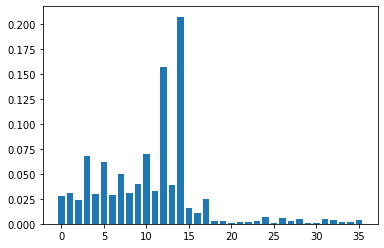

In [ ]:
for i,v in enumerate(X_train.columns[0:19]):
  print(i,v,importance[i]*100)
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
X_train

,USER NO,AGE,WEIGHT,CALORIES,PROTEIN,FAT,SODIUM,CARBOHYDRATES,FIBER,CHOLESTROL,P_FAT,P_CHOLESTROL,P_CARBOHYDRATES,P_PROTEIN,P_CALORIES,P_FIBRE,P_BARCODE,P_SODIUM,GENDER_M,DISEASE_Anemia,DISEASE_Appendicitis,DISEASE_Asthma,DISEASE_Bronchitis,DISEASE_Fibroids,DISEASE_Gallstones,DISEASE_HIgh Cholestrol,DISEASE_Hypoglycemia,DISEASE_Jaundice,DISEASE_Kidney Stones,DISEASE_Liver Cirrhosis,DISEASE_Lung Infection,DISEASE_Pancreatitis,DISEASE_Pneumonia,DISEASE_Thyroid,DISEASE_Tuberculosis,DISEASE_Typhoid
28495,29,41,65,0.000000,0.783784,0.024390,132,0.635057,24,0.386555,0.001,0.000000,0.172172,0.029445,0.082040,4.0,465.0,40.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
27652,28,27,75,0.401384,0.945946,0.365854,145,0.159783,29,0.134454,0.201,0.000000,0.088088,0.212911,0.299335,3.0,622.0,16.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
28406,29,41,65,0.000000,0.783784,0.024390,132,0.635057,24,0.386555,0.097,0.019506,0.045045,0.141563,0.174058,1.0,376.0,381.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
10947,11,41,63,0.778547,0.000000,0.756098,141,0.448342,17,0.386555,0.048,0.000000,0.341341,0.039638,0.216186,1.0,917.0,677.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
27264,28,27,75,0.401384,0.945946,0.365854,145,0.159783,29,0.134454,0.031,0.000000,0.475475,0.098528,0.277162,6.0,234.0,596.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29832,30,27,64,0.903114,0.594595,0.487805,113,0.289295,34,0.000000,0.362,0.000000,0.280280,0.294451,0.563193,12.0,802.0,13.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5420,6,59,74,0.038062,0.486486,0.365854,115,0.272623,18,0.453782,0.003,0.000000,0.213213,0.044168,0.111973,1.0,390.0,3.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
890,1,24,52,0.653979,0.540541,0.414634,148,0.262985,20,0.478992,0.137,0.383182,0.014014,0.144960,0.205100,0.0,860.0,146.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15825,16,26,65,0.380623,0.648649,0.292683,111,0.371582,18,0.462185,0.063,0.032943,0.000000,0.217441,0.154102,0.0,795.0,59.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
X1["CALORIES"] = df1[df1.columns[3]]
X1["FAT"]=df1[df1.columns[5]]
X1["CARBOHYDRATES"]=df1[df1.columns[12]]
X1["P_FAT"]=df1[df1.columns[10]]
X1["P_CALORIES"]=df1[df1.columns[14]]
y = df1.Class_Yes
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.30, random_state=42)

TypeError: ignored

In [ ]:
X

,USER NO,AGE,WEIGHT,CALORIES,PROTEIN,FAT,SODIUM,CARBOHYDRATES,FIBER,CHOLESTROL,P_FAT,P_CHOLESTROL,P_CARBOHYDRATES,P_PROTEIN,P_CALORIES,P_FIBRE,P_BARCODE,P_SODIUM,GENDER_M,DISEASE_Anemia,DISEASE_Appendicitis,DISEASE_Asthma,DISEASE_Bronchitis,DISEASE_Fibroids,DISEASE_Gallstones,DISEASE_HIgh Cholestrol,DISEASE_Hypoglycemia,DISEASE_Jaundice,DISEASE_Kidney Stones,DISEASE_Liver Cirrhosis,DISEASE_Lung Infection,DISEASE_Pancreatitis,DISEASE_Pneumonia,DISEASE_Thyroid,DISEASE_Tuberculosis,DISEASE_Typhoid
30,1,24,52,0.653979,0.540541,0.414634,148,0.912913,20,0.478992,0.000,0.000000,0.912913,0.002265,0.422395,0.0,0.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
31,1,24,52,0.653979,0.540541,0.414634,148,0.138138,20,0.478992,0.719,0.000000,0.138138,0.103058,0.766075,9.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
32,1,24,52,0.653979,0.540541,0.414634,148,0.058058,20,0.478992,0.001,0.000000,0.058058,0.010193,0.027716,3.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
33,1,24,52,0.653979,0.540541,0.414634,148,0.731732,20,0.478992,0.023,0.000000,0.731732,0.150623,0.406874,8.0,3.0,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
34,1,24,52,0.653979,0.540541,0.414634,148,0.304304,20,0.478992,0.020,0.000433,0.304304,0.012458,0.159645,1.0,4.0,46.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30025,30,27,64,0.903114,0.594595,0.487805,113,0.261261,34,0.000000,0.006,0.000000,0.261261,0.050963,0.144124,0.0,995.0,14.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30026,30,27,64,0.903114,0.594595,0.487805,113,0.029029,34,0.000000,0.258,0.040312,0.029029,0.158550,0.333703,1.0,996.0,756.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30027,30,27,64,0.903114,0.594595,0.487805,113,0.000000,34,0.000000,0.024,0.027308,0.000000,0.233296,0.121951,0.0,997.0,69.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30028,30,27,64,0.903114,0.594595,0.487805,113,0.680681,34,0.000000,0.136,0.000867,0.680681,0.046433,0.444568,1.0,998.0,418.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:")
print(accuracy_score(y_test,y_pred)*100)

Accuracy:
78.74444444444444
